In [17]:
from custom_filters import * 
from engine.utils import get_overlap_lst, normalize_image, save_npy, load_data, get_comparison
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

### config ###
split = 'train'
data_dir = "/data/yoojinoh/CV/data/"
num_images = 3
##############

In [18]:
def custom_filter(images):
    """Our Custom Filter to Use"""
    test_median = apply_median_blur(images, ksize=7)
    test_median_sobel = apply_sobel(test_median, ksize= 3)[2]
    test_median_sobel_gray = convert_to_grayscale(test_median_sobel)
    test_median_sobel_gray_gamma = apply_gamma_correction(test_median_sobel_gray, gamma=1.1)
    test_median_sobel_gray_gamma_normalized = normalize_image(test_median_sobel_gray_gamma)

    f1 = custom_filter_1(images);f1_norm = normalize_image(f1)
    f3 = custom_filter_3(images);f3_norm = normalize_image(f3)

    f1_f3_norm = get_overlap_lst(f1_norm, f3_norm, "add")
    f1f3_conventional = get_overlap_lst(f1_f3_norm, test_median_sobel_gray_gamma_normalized, "add", w1=2, w2=8)
    f1f3_conventional_norm = normalize_image(f1f3_conventional)

    pred_edges = f1f3_conventional_norm.copy()
    return pred_edges 

Processing image: train/20008


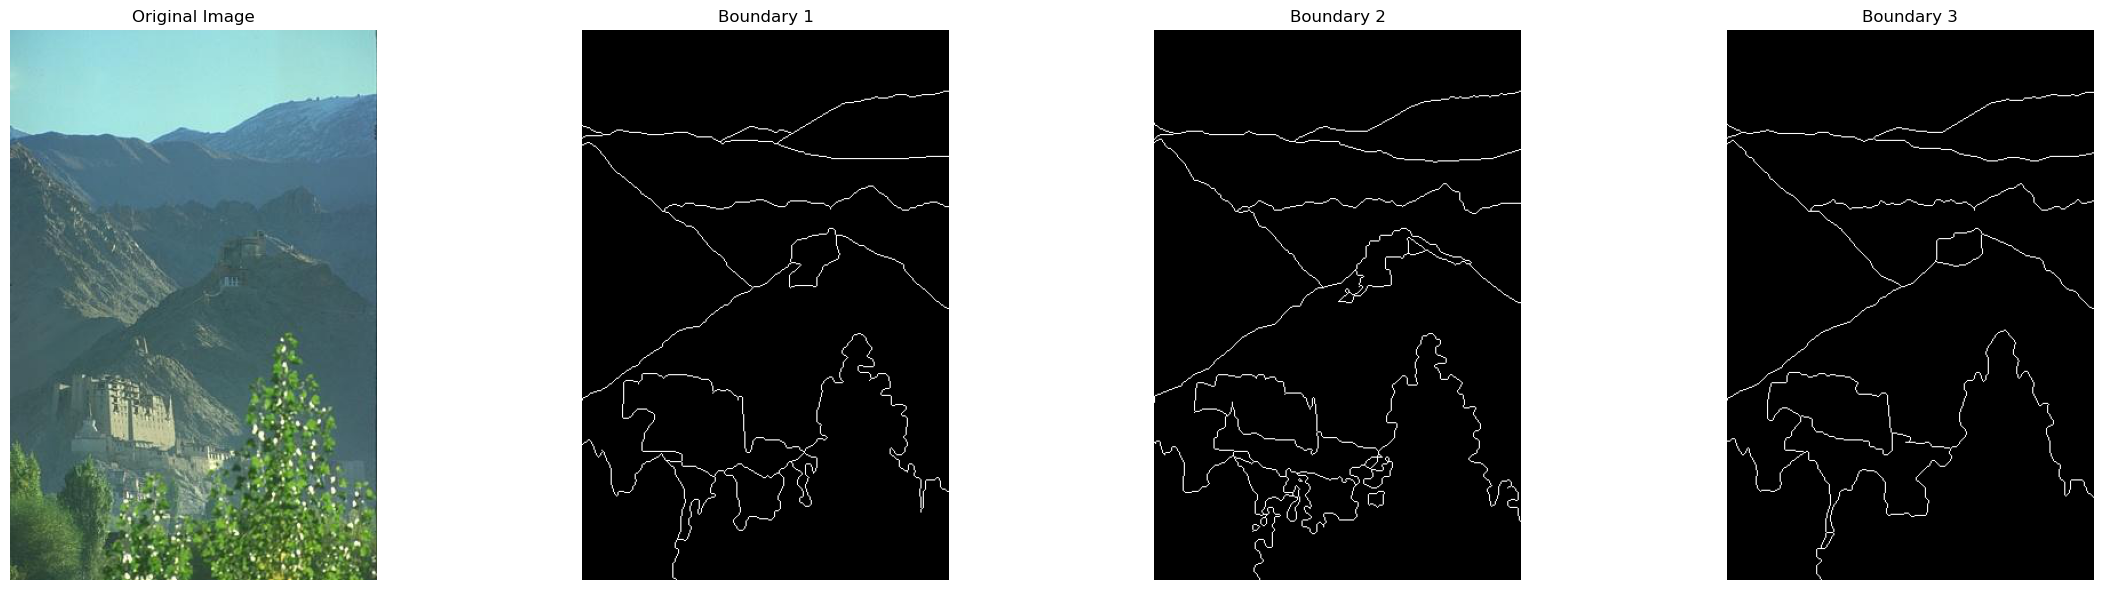

Processing image: train/156079


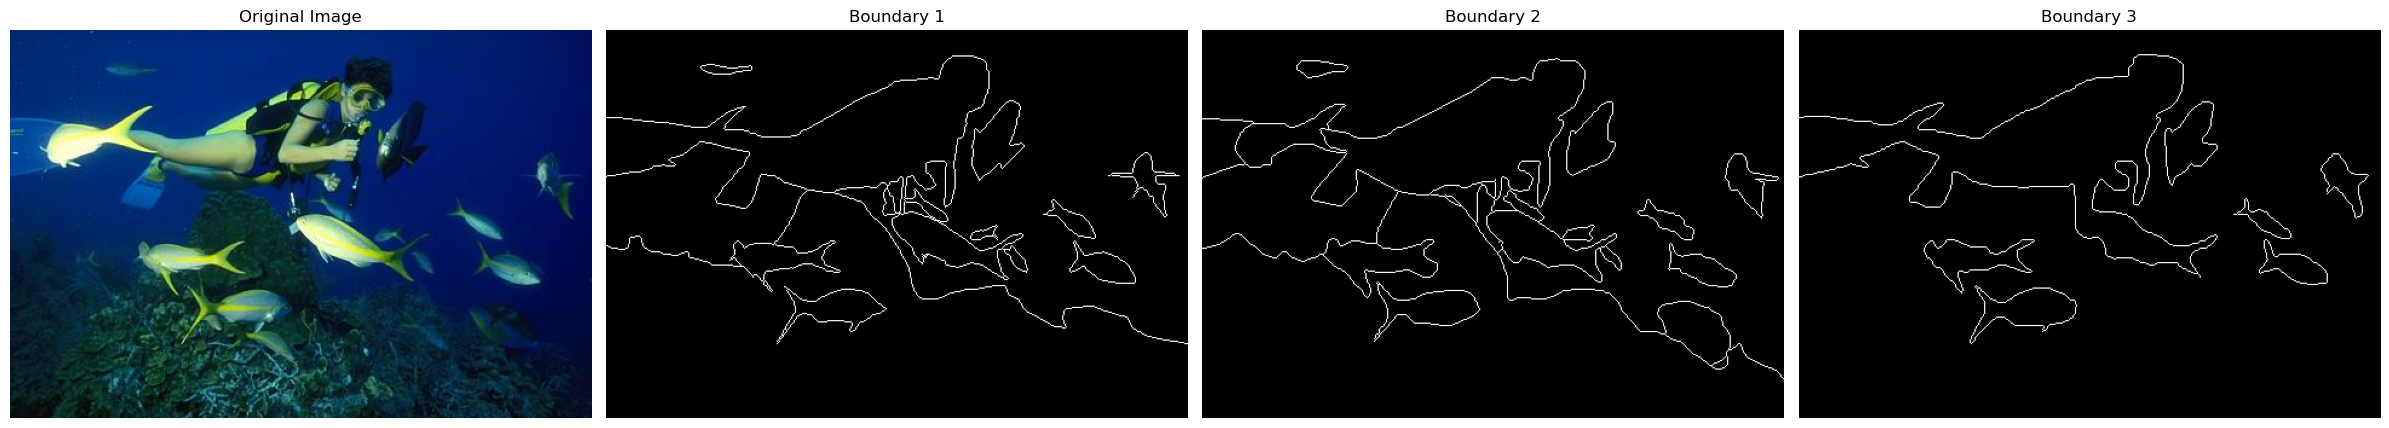

Processing image: train/104022


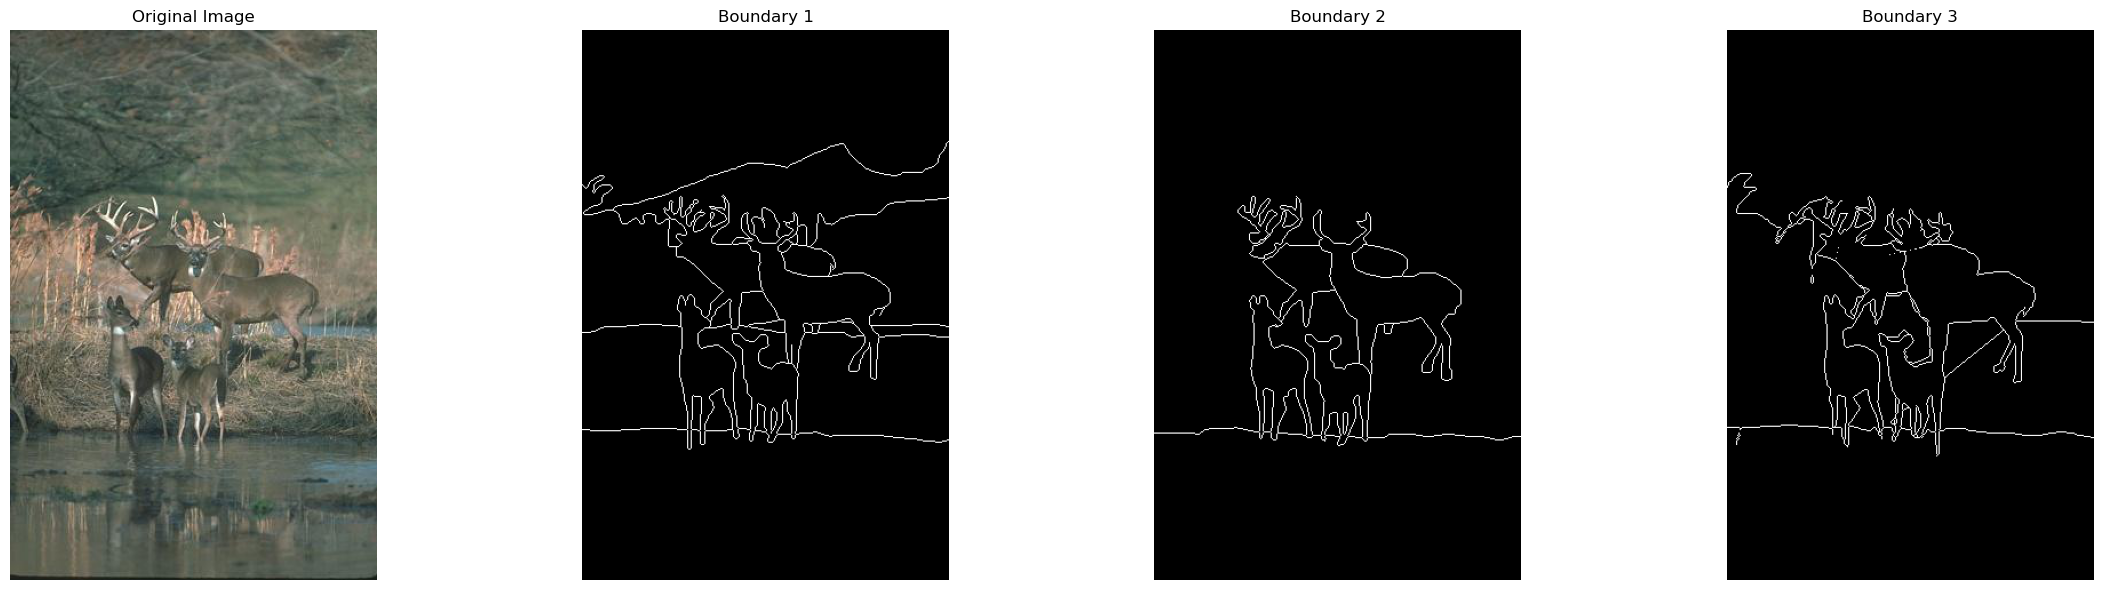

In [19]:
images, boundaries = load_data(data_dir, num_images, split) 

In [20]:
pred_edges = custom_filter(images) 

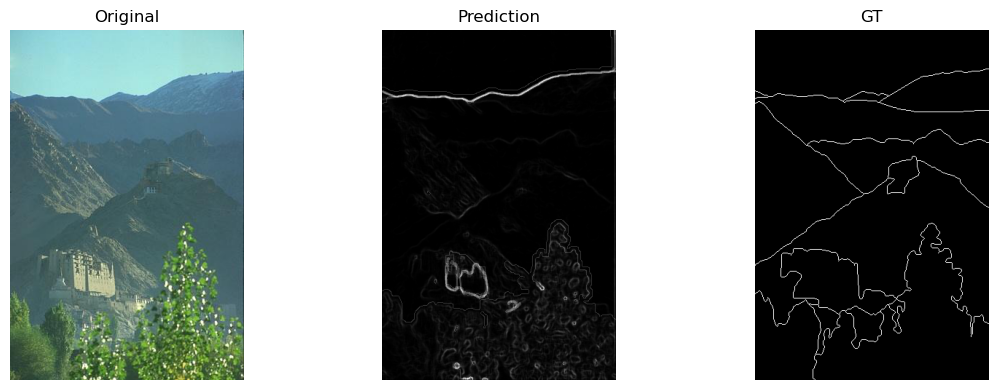

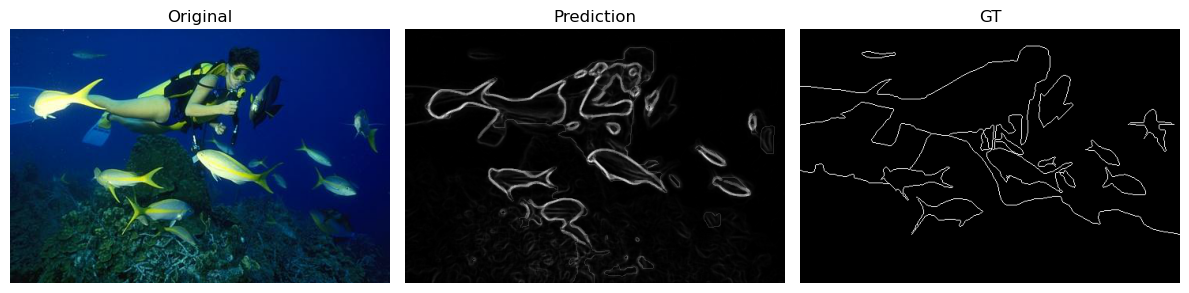

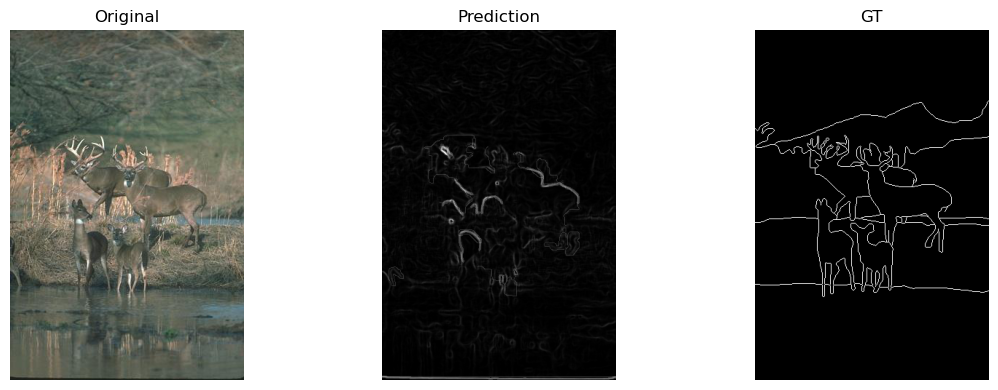

In [21]:
annot_idx = 0
gt_boundaries = [b[annot_idx] for b in boundaries]
get_comparison([images, pred_edges, gt_boundaries], ["Original", "Prediction", "GT"])